In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [2]:
data= pd.read_csv('C:/Users/Veena Chintala/Desktop/Take_home/Fraud_activiy/Fraud_Data.csv',
                  parse_dates =['signup_time','purchase_time'])
IPs = pd.read_csv('C:/Users/Veena Chintala/Desktop/Take_home/Fraud_activiy/IpAddress_to_Country.csv')
data.columns
IPs.columns

Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')

In [4]:
data['user_id'].value_counts()

countries = []
for i in range(len(data)):
    ip_address = data.loc[i, 'ip_address']
    tmp = IPs[(IPs['lower_bound_ip_address'] <= ip_address) &
                          (IPs['upper_bound_ip_address'] >= ip_address)]
    if len(tmp) == 1:
        countries.append(tmp['country'].values[0])
    else:
        countries.append('NA')

data['country']=countries
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:00,2015-04-18 02:47:00,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:00,2015-06-08 01:38:00,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:00,2015-01-01 18:52:00,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:00,2015-05-04 13:54:00,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA
4,221365,2015-07-21 07:09:00,2015-09-09 18:40:00,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [5]:
data.to_csv('C:/Users/Veena Chintala/Desktop/Take_home/Fraud_activiy/Book1.csv')

In [6]:
data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country'],
      dtype='object')

In [7]:
fraud = pd.read_csv('C:/Users/Veena Chintala/Desktop/Take_home/Fraud_activiy/Book1.csv', parse_dates=['signup_time','purchase_time'])
fraud.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,0,22058,2015-02-24 22:55:00,2015-04-18 02:47:00,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,1,333320,2015-06-07 20:39:00,2015-06-08 01:38:00,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,2,1359,2015-01-01 18:52:00,2015-01-01 18:52:00,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,3,150084,2015-04-28 21:13:00,2015-05-04 13:54:00,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,4,221365,2015-07-21 07:09:00,2015-09-09 18:40:00,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [8]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 13 columns):
Unnamed: 0        151112 non-null int64
user_id           151112 non-null int64
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           129146 non-null object
dtypes: datetime64[ns](2), float64(1), int64(5), object(5)
memory usage: 15.0+ MB


In [10]:
data = fraud

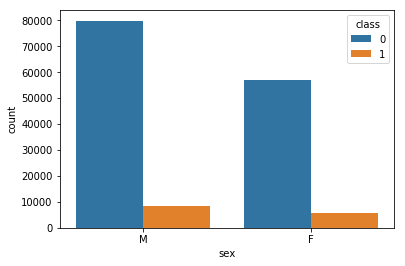

In [11]:
plt.figure()
sns.countplot(x ='sex', hue='class', data= data)
plt.show()

<Figure size 432x288 with 0 Axes>

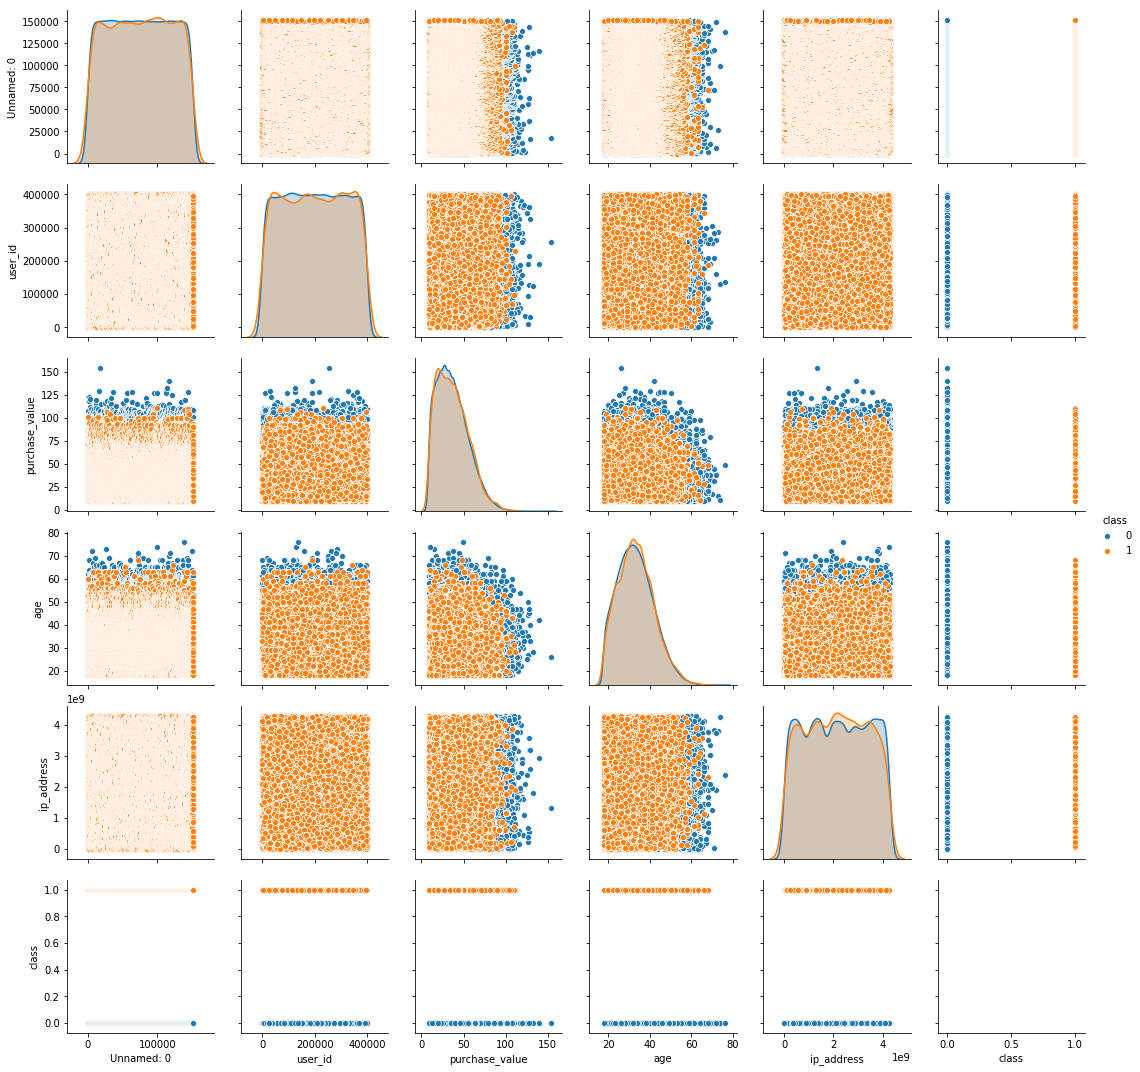

In [15]:
plt.figure()
sns.pairplot(data= data, hue = 'class')
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


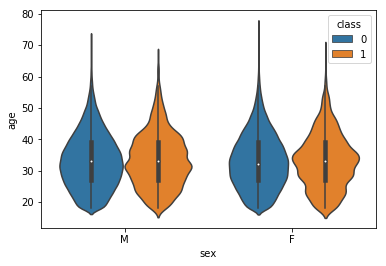

In [13]:
plt.figure()
sns.violinplot(x= 'sex', y = 'age', hue = 'class', data= data)
plt.show()

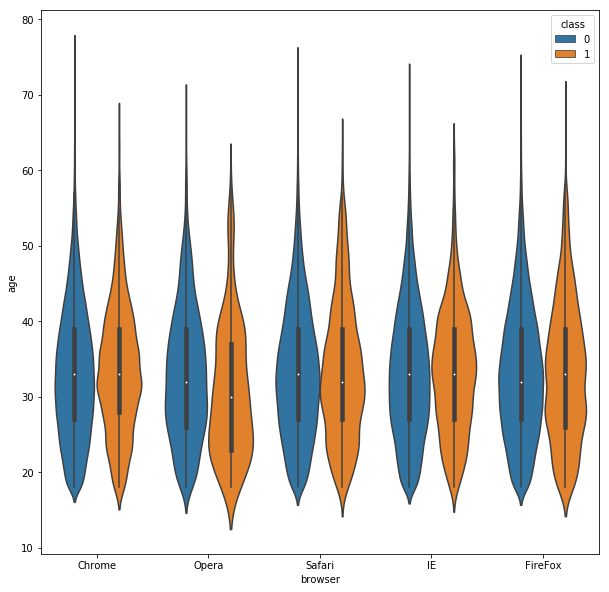

In [8]:
plt.figure(figsize=(10,10))
sns.violinplot(x= 'browser', y = 'age', hue = 'class', data= data)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='device_id', hue='class', data = data)
plt.show()

In [ ]:
len(data['device_id'].unique())

In [17]:
df = data.groupby('device_id', as_index=False).agg({'user_id':len, 'class':max})
df.head()

,device_id,user_id,class
0,AAALBGNHHVMKG,1,0
1,AAAWIHVCQELTP,1,0
2,AAAXJHWCLISKY,1,0
3,AAAXXOZJRZRAO,11,1
4,AABFGRPBQHWFQ,1,0


In [6]:
df.groupby(['user_id','class']).agg({'device_id':len})

device_id
user_id class           
1       0         127771
        1           4010
2       0           3158
        1           2169
3       0             40
        1             50
4       1              4
5       1             13
6       1             29
7       1             50
8       1             69
9       1             78
10      1             92
11      1            101
12      1             90
13      1             64
14      1             57
15      1             41
16      1             36
17      1             13
18      1             10
19      1              5
20      1              6

In [10]:
df.loc[df.user_id==4]

,device_id,user_id,class
7813,BMESXFKINIWTY,4,1
23422,EKWTABTNBCHTE,4,1
79024,OXWYEJXFZILGS,4,1
129717,YLDDOCJIVHEJV,4,1


In [11]:
fraud.loc[fraud.device_id == 'EKWTABTNBCHTE']

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
6121,6121,16743,2015-01-02 20:45:00,2015-01-02 20:45:00,43,EKWTABTNBCHTE,SEO,Chrome,M,33,3.520413e+09,1,United States
54208,54208,12729,2015-01-02 20:45:00,2015-01-02 20:45:00,43,EKWTABTNBCHTE,SEO,Chrome,M,33,3.520413e+09,1,United States
58777,58777,66931,2015-01-02 20:45:00,2015-01-02 20:45:00,43,EKWTABTNBCHTE,SEO,Chrome,M,33,3.520413e+09,1,United States
86910,86910,259294,2015-01-02 20:45:00,2015-04-04 11:04:00,43,EKWTABTNBCHTE,SEO,Chrome,M,33,3.520413e+09,0,United States


In [18]:
df.sort_values('user_id', ascending=False, inplace=True)
df.head()

,device_id,user_id,class
54521,KIPFSCNUGOLDP,20,1
69916,NGQCKIADMZORL,20,1
14100,CQTUVBYIWWWBC,20,1
46203,ITUMJCKWEYNDD,20,1
24607,EQYVNEGOFLAWK,20,1


In [ ]:
plt.figure()
sns.countplot(x= 'user_id', hue = 'class', data= data)
plt.show()